In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1 = pd.read_csv(r'Advertising.csv',index_col=0,header=0)
data1.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data1.dtypes)
print(data1.shape)
print(data1.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data1.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

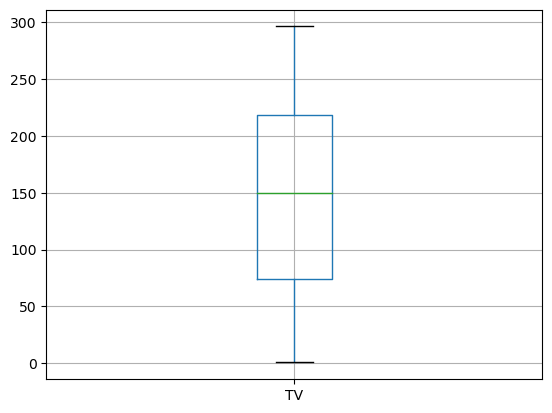

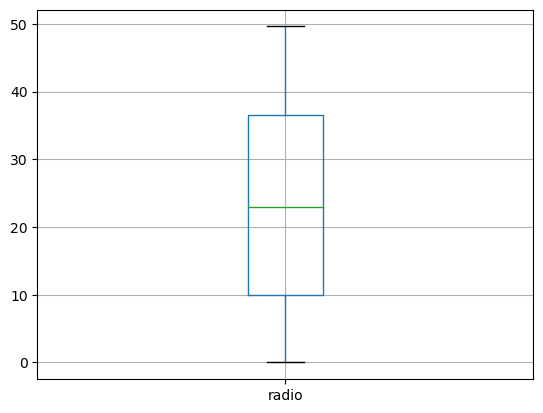

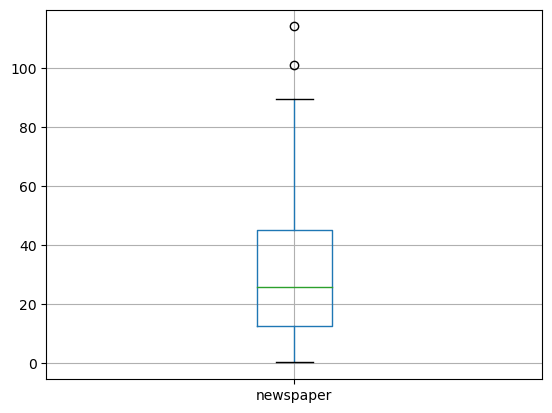

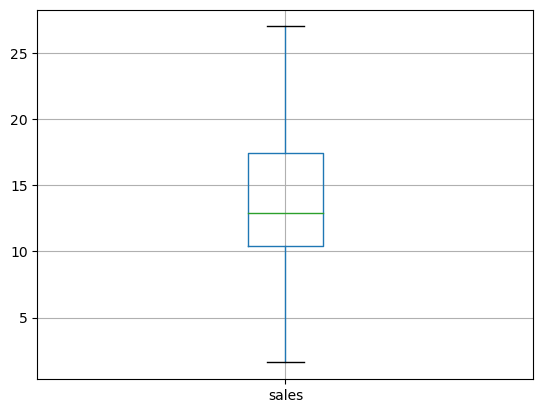

In [5]:
#Assumption 1: there should be no outliers in the data
#check Boxplot
for i in data1.columns:
    data1.boxplot(column=i)
    plt.show()

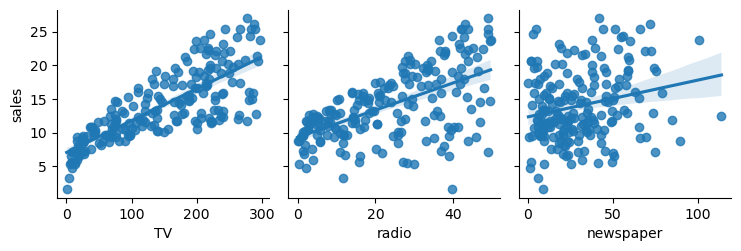

In [6]:
#Assumption 2: Assumption of linearity : every I V should have a 
#linear relationship with the D V.
sns.pairplot(data1,x_vars=['TV','radio','newspaper'],
                          y_vars="sales",kind="reg")
#plt.show()

In [7]:
#data.drop(["newpaper"],axis=1,inplace=True)

In [8]:
data1.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
#create X and Y
#[[ for multiple 
X = data1[['TV', 'radio', 'newspaper']]
Y = data1['sales']
#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

In [10]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [11]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='sales', ylabel='Density'>

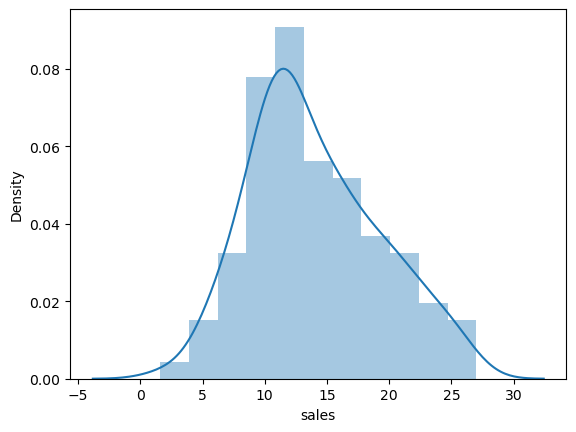

In [12]:
#Assumption of Normality: The dependent variable should follow on 
#approximate normal distribution
sns.distplot(Y)
#plt.show()

In [13]:
"""
#Log transformation 
import numpy as np
Y_log = np.log(Y)"""

'\n#Log transformation \nimport numpy as np\nY_log = np.log(Y)'

In [14]:
#sns.distplot(Y_log,hist=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

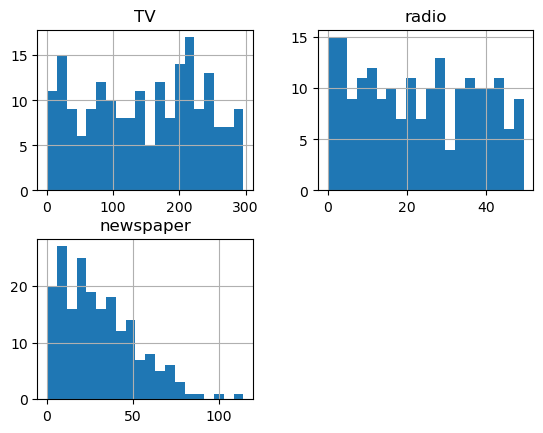

In [15]:
X.hist(bins=20)
#plt.show()

In [16]:
#in this case the newspaper variable is highly skewed

In [17]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

"""log1p is used to avoid getting a infinite value when data is consist of 0 value."""

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


'log1p is used to avoid getting a infinite value when data is consist of 0 value.'

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


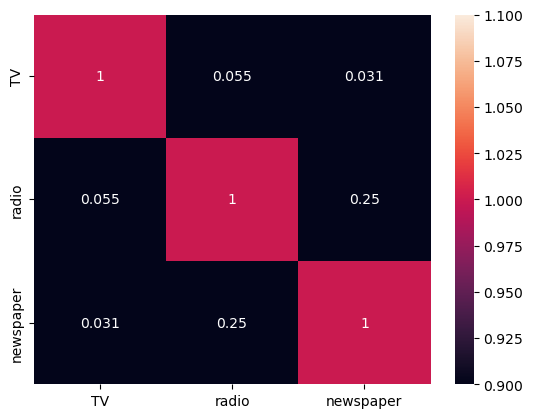

In [18]:
#assumption of no multicollinearity: There should be no multicollinearity 
#between the independent variables
#multicollinearity is the relationship amongst the independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=1.0,annot=True)
plt.show()



In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

#X.drop("newspaper",axis=1,inplace=True)
#rerun the VIF code

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [20]:
from sklearn.model_selection import train_test_split
#split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state = 10) 


In [21]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print("Percent of train data", X_train.shape[0]/X.shape[0]*100)
print("Percent of test data", X_test.shape[0]/X.shape[0]*100)
print("Percent of train data", Y_train.shape[0]/Y.shape[0]*100)
print("Percent of test data", Y_test.shape[0]/Y.shape[0]*100)

(160, 3)
(40, 3)
(160,)
(40,)
Percent of train data 80.0
Percent of test data 20.0
Percent of train data 80.0
Percent of test data 20.0


In [22]:
#>1000 ----> test_size = 0.3
#<1000 ----> test size =0.2

In [23]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [24]:
#pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.19303707897345299), ('newspaper', -0.04895136822248783)]


In [25]:
# X1=100
# X2=100
# X3=np.log1p(100)
# Y_pred=3.353291385815151+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
# print(Y_pred)

In [26]:
# X1=100
# X2=100
# X3=np.log1p(0)
# Y_pred=3.353291385815151+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
# print(Y_pred)

In [27]:
X1=100
X2=200
X3=np.log1p(0)
Y_pred=3.353291385815151+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(Y_pred)

46.33495738581515


In [28]:
#Predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [29]:
new_df = pd.DataFrame()
new_df= X_test.copy()

new_df["Actual sales"] =Y_test
new_df["Predicted sales"]= Y_pred
new_df = new_df.reset_index().drop("index", axis =1)
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


<AxesSubplot:>

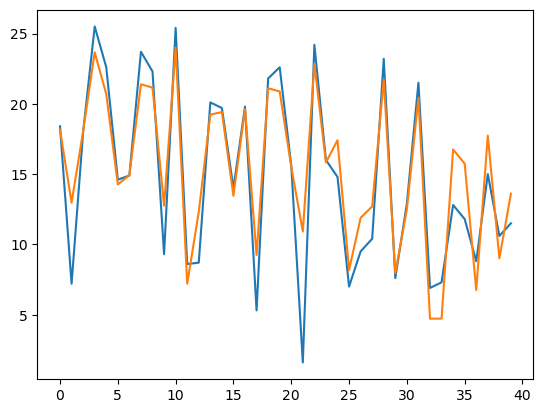

In [30]:
new_df["Actual sales"].plot()
new_df["Predicted sales"].plot()

In [31]:
#sns.pairplot(new_df1)
#plt.show()

In [32]:
lm.score(X_train,Y_train)
#Y_pred = lm.predict(x_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [34]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [35]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


<AxesSubplot:xlabel='sales'>

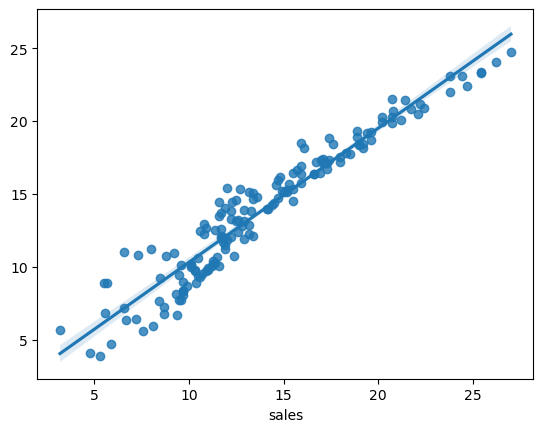

In [36]:
sns.regplot(x=Y_train,y=lm.predict(X_train),ci=95)

In [37]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]
"""

3.352247172596602
[ 0.04374234  0.19302603 -0.04853131]


'\nprevious values:\n3.353291385815151\n[ 0.0437425   0.19303708 -0.04895137]\n'

In [38]:
Y_pred=lm.predict(X_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348082644975934
RMSE: 2.5929204626839986
Adj R-square: 0.832279819566434


In [40]:
# R-squared: 0.834801071903532
# RMSE: 2.59297691109306
# Adj R-square: 0.8322725168816474

In [41]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [42]:
Y_pred=lm.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [44]:
# lasso is better then other models 

In [45]:
# OLS  --> OLS (Y_train,X_train)
#ols -->ols (Y~X1+X2+X3)

In [46]:
#fit(X_train, Y_train) --> sklearn
#Y~X1+X2+X3,data=df --> statsmodels

In [47]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [48]:
import statsmodels.formula.api as sm
# create a fitted model with all three features
lm_model = sm.ols(formula = 'sales ~ TV + radio + newspaper',
                 data= new_df).fit()
#print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]
"""


Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.10e-85
Time:                        19:47:37   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.353291385815151\n[ 0.0437425   0.19303708 -0.04895137]\n'